<a href="https://colab.research.google.com/github/gus474/Masking-Spectral-Crop-Data/blob/main/Spectral%20Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hyperspectral imaging (HSI) is a technique that analyzes a wide spectrum of light instead of just assigning primary colors (red, green, blue) to each pixel. The light striking each pixel is broken down into many different spectral bands in order to provide more information on what is imaged (Schneider and Feussner, 2017). HSI is used across many applications within the field of biosystems engineering, including agricultural production, food processing, microbial analysis, and more. Given its high spectral resolution, HSI can provide unique signatures that enable the detection and quantification of biological, chemical, and physical phenomena.

As one example, HSI is commonly used within agricultural production to detect crop stress and productivity and classify different crop types, among other uses. Partly for this purpose, NASA regularly flies an aircraft equipped with a HSI sensor, called AVIRIS, over various parts of North America throughout the year. AVIRIS is an optical sensor that delivers calibrated images of the reflected spectral radiance from Earth's surface over 224 contiguous spectral channels (bands) with wavelengths from 400 to 2500 nanometers. Each spectral band is sensitive within an approximately 9 to 15 nm range (i.e. the spectral bandwidth; see <a href="https://engineering.purdue.edu/~biehl/MultiSpec/aviris_documentation.html"> this link </a> for more details). The resulting data is a "hyperspectral cube" where two dimensions are spatial and one is spectral.


<center><img src="https://aviris.jpl.nasa.gov/data/images/avcubebig.gif"/></center>



This hyperspectral image was collected by the 224-band [AVIRIS sensor](https://aviris.jpl.nasa.gov/) over Salinas Valley, California, and is characterized by high spatial resolution (3.7-meter pixels). The area covered comprises 512 pixels by 217 pixels.  For example, the first band is sensitive to 400 $\pm$ 5 nm. The 20 water absorption bands (i.e 108-112, and 154-167) were discarded. The image contains vegetables, bare soils, and vineyard fields within its field of view.


Loading the `aviris_band_table.csv` as a Pandas `DataFrame`  and assigning it to the variable name `df_aviris_table`. Printing the table.
- There are 204 different bands.
- The bands' wavelengths range from 400 to 2500 nanometers.
- Their bandwidths range from 9 to 15 nanometers. 

In [1]:
import numpy as np #Importing the numpy library
import pandas as pd #Importing the Pandas library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Printed Table.

In [2]:
df_aviris_table = pd.read_table('/content/drive/MyDrive/EBSTUT/aviris_band_table.csv', sep = ",") # Calling my table, and separating values by the ',' deliminator.
df_aviris_table 

,band_id,wavelength_nm,bandwidth_nm
0,2,400,10
1,3,410,10
2,4,420,10
3,5,429,10
4,6,439,10
...,...,...,...
199,220,2460,15
200,221,2469,15
201,222,2479,15
202,223,2489,15


In [ ]:
df_aviris_table.describe()

,band_id,wavelength_nm,bandwidth_nm
count,204.000000,204.000000,204.000000
mean,109.813725,1408.901961,10.887255
std,66.219925,623.083877,2.326128
min,2.000000,400.000000,9.000000
25%,52.750000,867.500000,9.000000
50%,103.500000,1328.000000,10.000000
75%,173.250000,1995.500000,14.000000
max,224.000000,2499.000000,15.000000


Loading the `salinas_ca_hyperspectral.npy` file as a `ndarray` object and assigning it the variable `arr_hs`. 

- arr_hs has the dimensions, 512x217x204.  
 - The X and Y axis (first two dimensions) refer to the pixel by pixel count of the image, and the 3rd dimension refers to the # of bands/channels.
- The data type of arr_hs is a 16-bit integer. 
 - Thus, arr_hs can hold a range of 2^16 (65,536) integer values. The values in arr_hs can range between: (-32,768 to 32,768). `ndarray` can hold? 
 - This is derived from a bit, taking a 0 or a 1 value, and each value of arr_hs's integer can hold up to 16 bits, therefor 2^16. 
 - The standard unit of memory is a byte, which consists of 8 bits. 16(bits)/8(bits) = 2 (bytes). An array with the type int64 would hold 64/8 (8 bytes). Hence, an array of type int16 is requires only a fourth of the memory requirement than that of one with type int64.



In [3]:
arr_hs = np.load('/content/drive/MyDrive/EBSTUT/salinas_ca_hyperspectral.npy')
arr_hs.shape  

(512, 217, 204)

In [4]:
arr_hs.dtype 

dtype('int16')

In [5]:
arr_hs.itemsize

2

 Plotting every twentieth spectral band (11 bands total) in a single row.
- I end up with 11 images plotted along a single row (one for each of the selected bands) and make the plot large enough to cover most of the screen.
- I use a `for` loop, a `plt.axis('off')` (to turn off the axes for each subplot), and a `plt.title()` (to add a title to each subplot). 
- For the `label` argument, I use the value from the `wavelength_nm` column in the corresponding row of the `df_aviris_table` `DataFrame` by noting that the rows in `df_aviris_table` are in the same order as the indices of the `arr_hs` `ndarray` object. 

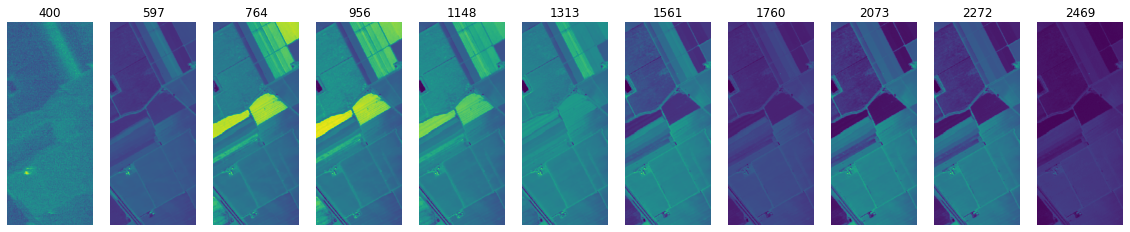

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for i, j in enumerate(np.arange(0, 204, 20)):
  plt.subplot(1, 11, i+1) # Subplot defines the number of subplots in the overall plot
  plt.axis('off')    
  plt.title(df_aviris_table['wavelength_nm'][j])
  plt.imshow(arr_hs[:, :, j])


The HSI image loaded above corresponds with an agricultural location in Salinas, California. There are actually a number of crops at various stages of growth in the image. There is also a corresponding ground-truth image that classifies the image into each crop type. Each pixel value in this array is an integer that encodes the crop type/status. Here's a table showing what each integer value corresponds with.

<center><img src='https://drive.google.com/uc?export=view&id=1f1aOUDyf6ymvcKqVSo4qqDgIyCS-sUVD'></center>

- First I load the salinas ground-truth numpy file `salinas_gt.npy` and assign it to the variable `salinas_gt`
- Then plot `salinas_gt` `ndarray` object using the color map called `tab20c` (see all colormaps [listed here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)), and include a colorbar as well.



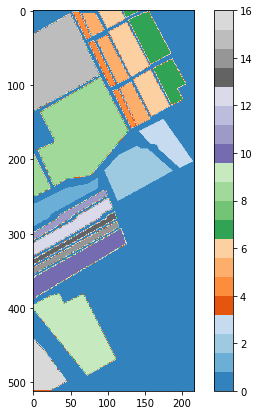

In [ ]:
salinas_gt = np.load('/content/drive/MyDrive/EBSTUT/salinas_gt.npy')
plt.figure(figsize=(7, 7))
plt.imshow(salinas_gt[:, :], cmap='tab20c')
plt.colorbar()

Creating array "masks" for isolating spectral data within a single crop type:
- Creating two new `boolean` arrays from `salinas_gt` for the following classes defined in the table above: "Brocolli_green_weeds_2" and "Celery". 
- Assigning the variables to the names `brocolli_mask` and `celery_mask`, respectively. 
- Each array is only `True` at the elements (i.e. pixels) which correspond to a given class (e.g. "Brocolli_green_weeds_2"), and `False` at all other elements. 
- Checking that the resulting arrays have the same `shape` as `salinas_gt`. 
- Plotting each array with a color bar.

*Python is `0` indexed whereas the table above is `1` indexed.* 
  

In [ ]:
brocolli_mask   = salinas_gt == 2 #Assigning brocolli_mask  to it's corresponding values in the diagram. 

celery_mask = salinas_gt ==7 #Assigning celery_mask to it's corresponding values in the diagram. 


In [ ]:
brocolli_mask.shape # Confirming that the shape is the same size as the original numpy file.

(512, 217)

In [ ]:
celery_mask.shape # Confirming that the shape is the same size as the original numpy file.

(512, 217)

Using the masks generated above, I isolate spectral values for pixels that correspond with only brocolli or celery in the `arr_hs` array.
- Generating two new arrays `arr_hs_brocolli` and `arr_hs_celery`
- Both arrays keep the original spectral reflectance values only where a given crop exists (e.g. celery). Every element (i.e. pixel) that is a different crop should denote a `0` (e.g. lettuce, corn, etc.). 
- Adding a third axis to `brocolli_mask` and `celery_mask`, respectively via the (NumPy) syntax, `brocolli_mask[:, :, np.newaxis]`. 
- After adding the new axis, both arrays have the same number of dimensions as `arr_hs`
- Plotting the 100th spectral band for `arr_hs_brocolli` and `arr_hs_celery` with colorbars.

In [ ]:
celery_mask = np.repeat(celery_mask[: , : , np.newaxis], 204 , 2) #np.repeats allows us to repeat elements of the array & 204 specificies the #. 
brocolli_mask = np.repeat(brocolli_mask[: , :, np.newaxis], 204 , 2) #2 defines the axis to repeat by. 
arr_hs_celery = celery_mask * arr_hs
arr_hs_brocolli = brocolli_mask * arr_hs
print(arr_hs_brocolli.shape) #Checking to see if both remain the same size. 
print(arr_hs_celery.shape)  #Checking to see if both remain the same size.
print(arr_hs.shape) #Both are indeed the same size.

(512, 217, 204)
(512, 217, 204)
(512, 217, 204)


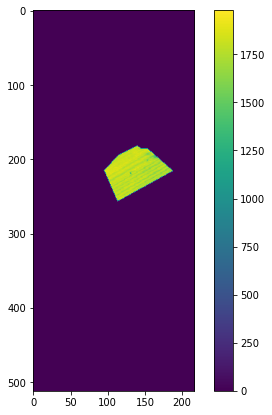

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(arr_hs_brocolli [:, :, 99]) #plotting the 99th index (100th band) for arr_hs_brocolli
plt.colorbar() 


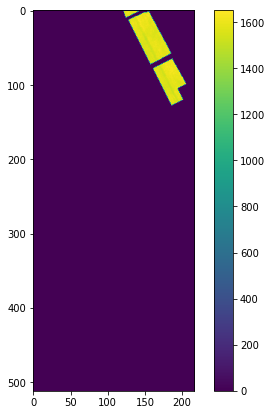

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(arr_hs_celery[:, :, 99]) #Plotting the 99th index (100th band) for arr_hs_celery
plt.colorbar()


For each `arr_hs_brocolli` and `arr_hs_celery` I calculate the mean value for each spectra only including elements (i.e. pixels) that correspond with brocolli or celery classes, respectively.
- Assigning the output for each brocolli and celery to 1D arrays (i.e. vector) named `vec_hs_brocolli` and `vec_hs_celery`, resectively.
- Repeating the calculation of the mean for each band, **excluding zero values**.
- Checking that the shape of the vectors match the dimension of the spectral axis of the original 3D array (204)

In [ ]:
vec_hs_brocolli = np.array([]) #defining 1D arrays
vec_hs_celery = np.array([])
vec_hs_brocolli 
#vec_hs_celery = arr_hs_celery 

array([], dtype=float64)

In [ ]:
a,b,c = arr_hs.shape #Provides the range we are iterating over.
for j in range(c):
  vec_hs_brocolli = np.insert(vec_hs_brocolli, j, np.sum(arr_hs_brocolli[:,:,j])/np.sum(brocolli_mask[:,:,j]), 0)#np.insert inputs values along specified axis/indicies/etc.
  #np.sum along True and False column
vec_hs_brocolli.shape

(204,)

In [ ]:
for k in range(c):
  vec_hs_celery = np.insert(vec_hs_celery, k, np.sum(arr_hs_celery [:,:,k])/np.sum(celery_mask[:,:,k]), 0)
vec_hs_celery.shape

(204,)

Adding the newly created `vec_hs_brocolli` and `vec_hs_celery` as columns within the `df_aviris_table` from earlier. Naming the columns as `hs_brocolli_field` and `hs_celery_field`.

In [ ]:
df_aviris_table['hs_brocolli_field'] = pd.DataFrame(vec_hs_brocolli) #Creates a dataframe for the array. 
df_aviris_table['hs_celery_field'] = pd.DataFrame(vec_hs_celery )
df_aviris_table #Evaulating the df.


,band_id,wavelength_nm,bandwidth_nm,hs_brocolli_field,hs_celery_field
0,2,400,10,395.393451,345.428332
1,3,410,10,499.255233,430.393406
2,4,420,10,706.614063,574.780665
3,5,429,10,1153.752281,903.980441
4,6,439,10,1454.304079,1108.916178
...,...,...,...,...,...
199,220,2460,15,15.418411,14.217379
200,221,2469,15,9.908749,8.933501
201,222,2479,15,5.111379,4.739592
202,223,2489,15,1.982287,1.768092


Using the `plotnine` library I plot `hs_brocolli_field` and `hs_celery_field` columns versus `wavelength_nm` as two lines on the same plot.
- Adding multiple `geom_line()` functions together, one for each `hs_brocolli_field` and `hs_celery_field` column
- Setting the `hs_brocolli_field` and `hs_celery_field` as `grey` and `magenta`, respectively.
 - **Note**: I can set a single color per `geom_line()` plot outside of the `aes()` function by using `color='grey'`, for example.
- Using the `theme_bw()` I simplify the look of the chart. I add a x-axis label of "wavelength (nm)," and y-axis label of "radiance (uW / cm^2 / nm / sr)."

In [ ]:
from plotnine import * #Calling in the plotnine library.


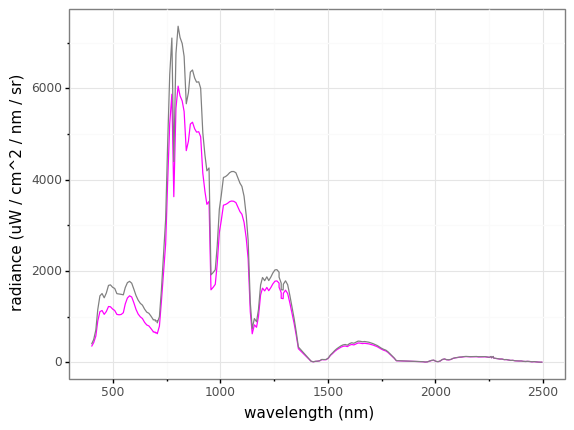

<ggplot: (8776487946513)>

In [ ]:
ggplot(data = df_aviris_table ) +\
geom_line(aes(x='wavelength_nm  ', y='hs_celery_field '),color = 'magenta') +\
geom_line(aes(x='wavelength_nm ', y='hs_brocolli_field '), color='grey') +\
xlab("wavelength (nm)") +\
ylab("radiance (uW / cm^2 / nm / sr)") +\
theme_bw()

#specifying color, column for x axis, and column for y axis. 

#Labeling the x axis.
#Labeling the y axis.


From this I gather that we could: 
- Check for the radiance level over certain wavelengths, those that are greater on average (atleast initially) could be used to discriminate between Brocolli and Celery.
- See that Brocolli tends to have higher overall radiance than Celery from wavelengths about 350nm to 1250nm. Specifically, the regions between 380-700nm (visible light), 800nm-950nm (infrared light), 1000nm-1100nm (infrared light), and possibly 1150nm-1350nm (more infrared light).